<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter01/imblearn_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Let's install our favorate library imbalanced-learn

In [ ]:
%%capture
!pip3 install imbalanced-learn==0.11.0

## Let's create some synthetic dataset for our analysis


In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def make_data(sep):
    X, y = make_classification(
        n_samples=50000,
        n_features=2,
        n_redundant=0,
        n_clusters_per_class=1,
        weights=[0.995],
        class_sep=sep,  # how separate the classes are
        random_state=1,
    )

    X = pd.DataFrame(X, columns=["feature_1", "feature_2"])
    y = pd.Series(y)

    return X, y

## Let's analyse the generated dataset

0    49498
1      502
dtype: int64


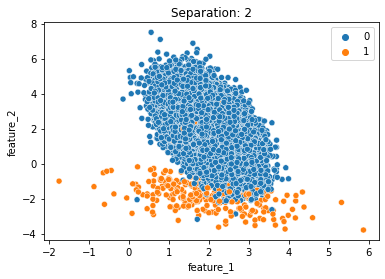

In [ ]:
from collections import Counter

separation = 2
X, y = make_data(separation)
print(y.value_counts())
sns.scatterplot(data=X, x="feature_1", y="feature_2", hue=y)
plt.title("Separation: {}".format(separation))
plt.show()

## Let's split this dataset making sure the same ratio of majority and minority classes in both training set and test set.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)
print("train data: ", Counter(y_train))
print("test data: ", Counter(y_test))

train data:  Counter({0: 39598, 1: 402})
test data:  Counter({0: 9900, 1: 100})


## Let's train a logistic regression model on training data

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=2000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## Let's get the report metrics from sklearn library

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9900
           1       0.94      0.17      0.29       100

    accuracy                           0.99     10000
   macro avg       0.97      0.58      0.64     10000
weighted avg       0.99      0.99      0.99     10000



## Let's get the report metrics from imblearn. Notice the extra metrics when compared to sklearn's API

In [ ]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.17      1.00      0.41      0.18      9900
          1       0.94      0.17      1.00      0.29      0.41      0.16       100

avg / total       0.99      0.99      0.18      0.99      0.41      0.18     10000

